In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import autoencoder as ae
#import classification as cf
import autoencoder_depart as aed
import depart_classification as dcf
from input import Bearing_dataset

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
X = tf.placeholder(dtype = tf.float32, shape = [None, ae.num_input], name = 'layer_1_input')
#layer_2_X = tf.placeholder(dtype = tf.float32, shape = [None, ae.num_hidden_1], name = 'layer_2_input')
#layer_3_X = tf.placeholder(dtype = tf.float32, shape = [None, ae.num_hidden_2], name = 'layer_3_input')
is_training = tf.placeholder(dtype = tf.bool, name = "train")
layer_1_para = aed.layer_para(X, aed.scope_name[0], is_training, 2.6e-3)
layer_2_X = aed.Encoder(X, aed.scope_name[0], is_training)
layer_2_para = aed.layer_para(layer_2_X, aed.scope_name[1], is_training, 8e-3)
layer_3_X = aed.Encoder(layer_2_X, aed.scope_name[1], is_training)
layer_3_para = aed.layer_para(layer_3_X, aed.scope_name[2], is_training, 6e-3)
layer_4_X = aed.Encoder(layer_3_X, aed.scope_name[2], is_training)
layer_4_para = aed.layer_para(layer_4_X, aed.scope_name[3], is_training, 6e-3)

def run_autoencoder(session, loss_val, Xd, predict,
                    drop_prob = 0.4,
                    num_steps = 40, batch_size=256, print_every = 100,
                    training = None, plot_losses = False):
    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    train_indices = np.arange(Xd.shape[0])
    np.random.shuffle(train_indices)

    variables = [loss_val, training, extra_update_ops]
   
    iter_cnt = 0
    correct = 0
    losses = []
    for i in range(num_steps):
        start_idx = (i * batch_size)%Xd.shape[0]
        idx = train_indices[start_idx: start_idx + batch_size]

        feed_dict = {X: Xd[idx, :], is_training: training is not None}
        actual_batch_size = Xd[idx].shape[0]
        loss,  _, _ = session.run(variables, feed_dict = feed_dict)
        losses.append(loss * actual_batch_size)
        #correct += np.sum(corr)

        if (iter_cnt%print_every) == 0:
            print("Iteration{0}: with minibatch training loss = {1:.3g}".format(iter_cnt, loss))
        iter_cnt += 1
    total_loss = np.sum(losses)/Xd.shape[0]
    print("Overall loss = {0:.3g} ".format(total_loss))
    if plot_losses:
        plt.plot(losses)
        plt.grid(True)
        plt.title('Loss')
        plt.xlabel("minibatch number")
        plt.ylabel('minibatch loss')
        plt.show()
    return total_loss



In [4]:
train_data = ae.mnist.train.images
train_labels = np.asarray(ae.mnist.train.labels, dtype=np.int32)
eval_data = ae.mnist.test.images
eval_labels = np.asarray(ae.mnist.test.labels, dtype=np.int32)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
b_train_data = Bearing_dataset.train_data
b_train_labels = Bearing_dataset.train_label
b_train_labels = tf.one_hot(b_train_labels, 10)
b_eval_labels = Bearing_dataset.eval_label
b_eval_labels = tf.one_hot(b_eval_labels, 10)
b_eval_data = Bearing_dataset.eval_data


In [5]:
print(b_train_labels)
print(b_train_data.shape)

Tensor("one_hot:0", shape=(7000, 10), dtype=float32)
(7000, 1200)


In [6]:
writer = tf.summary.FileWriter("/tmp/Bearing_detect/")

Pretrain layer_1:
Iteration0: with minibatch training loss = 1.48
Iteration50: with minibatch training loss = 0.882
Iteration100: with minibatch training loss = 0.711
Iteration150: with minibatch training loss = 0.656
Iteration200: with minibatch training loss = 0.726
Iteration250: with minibatch training loss = 0.675
Iteration300: with minibatch training loss = 0.624
Iteration350: with minibatch training loss = 0.64
Iteration400: with minibatch training loss = 0.648
Iteration450: with minibatch training loss = 0.574
Iteration500: with minibatch training loss = 0.613
Iteration550: with minibatch training loss = 0.642
Iteration600: with minibatch training loss = 0.563
Iteration650: with minibatch training loss = 0.642
Iteration700: with minibatch training loss = 0.625
Iteration750: with minibatch training loss = 0.568
Overall loss = 36.6 


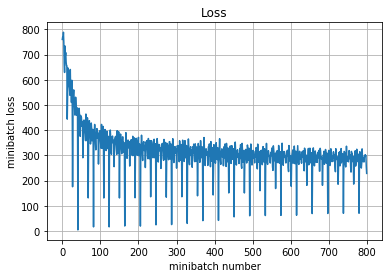

Pretrain layer_2:
Iteration0: with minibatch training loss = 1.01
Iteration50: with minibatch training loss = 0.966
Iteration100: with minibatch training loss = 0.615
Iteration150: with minibatch training loss = 0.217
Iteration200: with minibatch training loss = 0.0836
Iteration250: with minibatch training loss = 0.066
Iteration300: with minibatch training loss = 0.0488
Overall loss = 8.74 


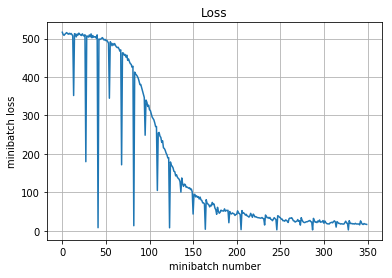

Pretrain layer_3:
Iteration0: with minibatch training loss = 0.911
Iteration50: with minibatch training loss = 0.75
Iteration100: with minibatch training loss = 0.256
Iteration150: with minibatch training loss = 0.0871
Iteration200: with minibatch training loss = 0.0265
Overall loss = 5.7 


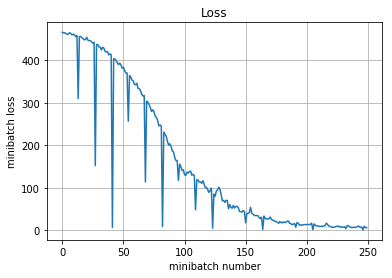

Pretrain layer_4:
Iteration0: with minibatch training loss = 0.675
Iteration50: with minibatch training loss = 0.401
Iteration100: with minibatch training loss = 0.0878
Iteration150: with minibatch training loss = 0.027
Overall loss = 3 


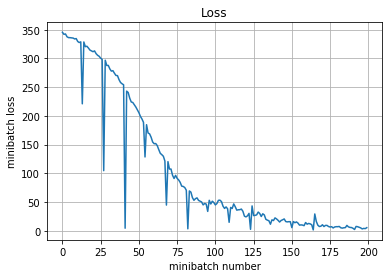

train
Iteration0: with minibatch training loss = 2.53 and accuracy of 0.1
Epoch 1, Overall loss = 2.4 and accuracy of 0.126
Epoch 2, Overall loss = 2.21 and accuracy of 0.184
Epoch 3, Overall loss = 2.06 and accuracy of 0.232
Epoch 4, Overall loss = 1.89 and accuracy of 0.279
Epoch 5, Overall loss = 1.76 and accuracy of 0.32
Epoch 6, Overall loss = 1.64 and accuracy of 0.355
Epoch 7, Overall loss = 1.54 and accuracy of 0.384
Iteration100: with minibatch training loss = 1.45 and accuracy of 0.41
Epoch 8, Overall loss = 1.46 and accuracy of 0.411
Epoch 9, Overall loss = 1.4 and accuracy of 0.433
Epoch 10, Overall loss = 1.35 and accuracy of 0.456
Epoch 11, Overall loss = 1.31 and accuracy of 0.465
Epoch 12, Overall loss = 1.25 and accuracy of 0.495
Epoch 13, Overall loss = 1.19 and accuracy of 0.522
Epoch 14, Overall loss = 1.13 and accuracy of 0.536
Iteration200: with minibatch training loss = 1.07 and accuracy of 0.59
Epoch 15, Overall loss = 1.08 and accuracy of 0.561
Epoch 16, Overal

Epoch 131, Overall loss = 0.356 and accuracy of 0.829
Epoch 132, Overall loss = 0.348 and accuracy of 0.831
Epoch 133, Overall loss = 0.345 and accuracy of 0.827
Epoch 134, Overall loss = 0.349 and accuracy of 0.826
Epoch 135, Overall loss = 0.344 and accuracy of 0.828
Iteration1900: with minibatch training loss = 0.355 and accuracy of 0.82
Epoch 136, Overall loss = 0.353 and accuracy of 0.827
Epoch 137, Overall loss = 0.375 and accuracy of 0.83
Epoch 138, Overall loss = 0.36 and accuracy of 0.823
Epoch 139, Overall loss = 0.35 and accuracy of 0.829
Epoch 140, Overall loss = 0.361 and accuracy of 0.827
Epoch 141, Overall loss = 0.339 and accuracy of 0.834
Epoch 142, Overall loss = 0.342 and accuracy of 0.829
Iteration2000: with minibatch training loss = 0.325 and accuracy of 0.82
Epoch 143, Overall loss = 0.329 and accuracy of 0.832
Epoch 144, Overall loss = 0.339 and accuracy of 0.829
Epoch 145, Overall loss = 0.344 and accuracy of 0.827
Epoch 146, Overall loss = 0.335 and accuracy of

Epoch 260, Overall loss = 0.293 and accuracy of 0.85
Epoch 261, Overall loss = 0.282 and accuracy of 0.848
Epoch 262, Overall loss = 0.281 and accuracy of 0.844
Epoch 263, Overall loss = 0.29 and accuracy of 0.844
Epoch 264, Overall loss = 0.288 and accuracy of 0.845
Iteration3700: with minibatch training loss = 0.283 and accuracy of 0.86
Epoch 265, Overall loss = 0.279 and accuracy of 0.849
Epoch 266, Overall loss = 0.287 and accuracy of 0.844
Epoch 267, Overall loss = 0.277 and accuracy of 0.852
Epoch 268, Overall loss = 0.286 and accuracy of 0.846
Epoch 269, Overall loss = 0.3 and accuracy of 0.845
Epoch 270, Overall loss = 0.273 and accuracy of 0.853
Epoch 271, Overall loss = 0.287 and accuracy of 0.848
Iteration3800: with minibatch training loss = 0.306 and accuracy of 0.86
Epoch 272, Overall loss = 0.283 and accuracy of 0.853
Epoch 273, Overall loss = 0.283 and accuracy of 0.855
Epoch 274, Overall loss = 0.283 and accuracy of 0.854
Epoch 275, Overall loss = 0.28 and accuracy of 0

Epoch 388, Overall loss = 0.21 and accuracy of 0.875
Epoch 389, Overall loss = 0.206 and accuracy of 0.882
Epoch 390, Overall loss = 0.221 and accuracy of 0.876
Epoch 391, Overall loss = 0.214 and accuracy of 0.874
Epoch 392, Overall loss = 0.212 and accuracy of 0.874
Iteration5500: with minibatch training loss = 0.227 and accuracy of 0.88
Epoch 393, Overall loss = 0.223 and accuracy of 0.875
Epoch 394, Overall loss = 0.206 and accuracy of 0.871
Epoch 395, Overall loss = 0.225 and accuracy of 0.88
Epoch 396, Overall loss = 0.206 and accuracy of 0.872
Epoch 397, Overall loss = 0.21 and accuracy of 0.874
Epoch 398, Overall loss = 0.214 and accuracy of 0.873
Epoch 399, Overall loss = 0.204 and accuracy of 0.877
Epoch 400, Overall loss = 0.204 and accuracy of 0.881
Iteration5600: with minibatch training loss = 0.193 and accuracy of 0.88
Epoch 401, Overall loss = 0.211 and accuracy of 0.878
Epoch 402, Overall loss = 0.217 and accuracy of 0.873
Epoch 403, Overall loss = 0.204 and accuracy of

Epoch 517, Overall loss = 0.187 and accuracy of 0.882
Epoch 518, Overall loss = 0.192 and accuracy of 0.881
Epoch 519, Overall loss = 0.199 and accuracy of 0.875
Epoch 520, Overall loss = 0.199 and accuracy of 0.879
Epoch 521, Overall loss = 0.186 and accuracy of 0.883
Iteration7300: with minibatch training loss = 0.213 and accuracy of 0.88
Epoch 522, Overall loss = 0.193 and accuracy of 0.885
Epoch 523, Overall loss = 0.2 and accuracy of 0.881
Epoch 524, Overall loss = 0.194 and accuracy of 0.882
Epoch 525, Overall loss = 0.197 and accuracy of 0.88
Epoch 526, Overall loss = 0.202 and accuracy of 0.88
Epoch 527, Overall loss = 0.199 and accuracy of 0.882
Epoch 528, Overall loss = 0.189 and accuracy of 0.881
Iteration7400: with minibatch training loss = 0.198 and accuracy of 0.87
Epoch 529, Overall loss = 0.188 and accuracy of 0.882
Epoch 530, Overall loss = 0.188 and accuracy of 0.88
Epoch 531, Overall loss = 0.195 and accuracy of 0.881
Epoch 532, Overall loss = 0.188 and accuracy of 0

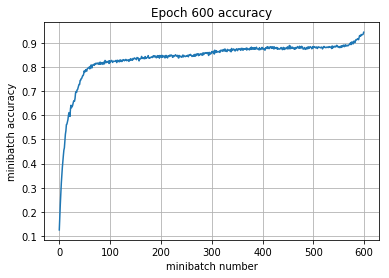

eval
Epoch 1, Overall loss = 0.164 and accuracy of 0.973


In [7]:
with tf.Session() as sess:
    writer.add_graph(sess.graph)
    sess.run(init)
    print("Pretrain layer_1:")
    run_autoencoder(sess, layer_1_para['loss'], b_train_data, layer_1_para['y_pred'],
                    1, 800, 512, 50, 
                    layer_1_para['optimizer'], True)
    print("Pretrain layer_2:")
    run_autoencoder(sess, layer_2_para['loss'], b_train_data, layer_2_para['y_pred'],
                   1, 350, 512, 50,
                   layer_2_para['optimizer'], True)
    print("Pretrain layer_3:")
    run_autoencoder(sess, layer_3_para['loss'], b_train_data, layer_3_para['y_pred'],
                    1, 250, 512, 50,
                    layer_3_para['optimizer'], True)
    print("Pretrain layer_4:")
    run_autoencoder(sess, layer_4_para['loss'], b_train_data, layer_4_para['y_pred'],
                    1, 200, 512, 50,
                    layer_4_para['optimizer'], True)
    print("train")
    dcf.run_model(sess, dcf.out, dcf.loss, b_train_data, b_train_labels.eval(), 0.55,
                 600, 512, 100,
                 dcf.train_step, True)
    print("eval")
    dcf.run_model(sess, dcf.out, dcf.loss, b_eval_data, b_eval_labels.eval(), 1, 1, 512)
    
    
    save_path = saver.save(sess, "/tmp/model.ckpt")